In [25]:
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.base import clone
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

import matplotlib.pyplot as plt
import numpy as np

In [26]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame = False)

In [27]:
train_samples = 10000
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size = train_samples, test_size = 3000)

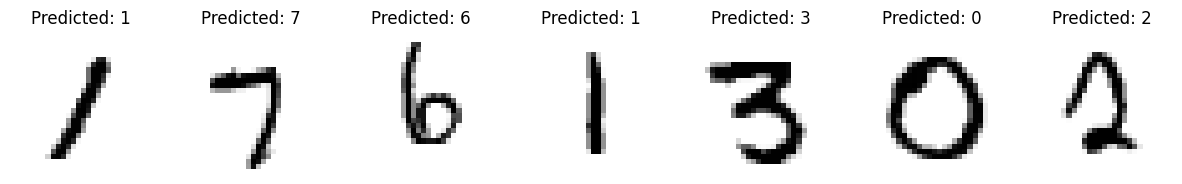

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=len(train_y[:7]), figsize = (15, 5))
for ax, image, label in zip(axes, train_x[:7], train_y[:7]):
    ax.set_axis_off()
    ax.imshow(image.reshape((28, 28)), cmap = plt.cm.gray_r)
    ax.set_title("Predicted: %s" % str(label))


In [29]:
KNN_classifiers = []
for i in range(10):
    KNN_classifiers.append(KNeighborsClassifier(i + 2))

In [30]:
def cross_val_score_mod(classifier, X, y, folds, shuffle = False):
    #K-Folds cross-validator
    #Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds (without shuffling by default).
    #Each fold is then used once as a validation while the k - 1 remaining folds form the training set.
    kf = KFold(n_splits = folds, shuffle = shuffle)
    trained_classifier = []
    accuracy_list = []
    for train_index, test_index in kf.split(X):
        X_train_kfold, X_test_kfold = X[train_index], X[test_index]
        y_train_kfold, y_test_kfold = y[train_index], y[test_index]
        classifier_fold = clone(classifier)
        classifier_fold.fit(X_train_kfold, y_train_kfold)
        prediction = classifier_fold.predict(X_test_kfold)
        accuracy = accuracy_score(y_test_kfold, prediction)
        trained_classifier.append(classifier_fold)
        accuracy_list.append(accuracy)
    return trained_classifier, accuracy_list

In [31]:
def check_classifier(classifier, X_train, y_train, X_val, y_val):
    trained_classifier, accuracy_list = cross_val_score_mod(classifier, X_train, y_train, 5)
    best_classifier = trained_classifier[np.argmax(accuracy_list)]
    accuracy = 0.0
    for i in range(len(accuracy_list)):
        accuracy += accuracy_score(y_val, trained_classifier[i].predict(X_val))
    print(accuracy_list)
    print("Accuracy %.4f" %  (accuracy / len(accuracy_list)))

    return best_classifier

In [32]:
def plot_confusion_matrix(predicted, y):
    # Compute confusion matrix to evaluate the accuracy of a classification.
    confusion_matr = confusion_matrix(y, predicted)
    # Confusion Matrix visualization.
    print(confusion_matr)

In [33]:
def show_predict_and_real(X, y):
    fig, axes = plt.subplots(nrows=1, ncols=len(y), figsize = (15, 5))
    for ax, image, label in zip(axes, X, y):
        ax.set_axis_off()
        ax.imshow(image.reshape((28, 28)), cmap = plt.cm.gray_r)
        ax.set_title("Predicted: %s" % str(label))

In [34]:
def show_classifier_result(clf, X_train, y_train, X_val, y_val, show_number = True):
    best_clf = check_classifier(clf, X_train, y_train, X_val, y_val)
    Z = best_clf.predict(X_val)
    plot_confusion_matrix(y_val, Z)
    wrong_predictions = [i for i in np.arange(len(Z)) if Z[i] != y_val[i]]
    if show_number:
        show_predict_and_real(X_val[wrong_predictions][:8], Z[wrong_predictions][:8])

[0.9215, 0.9375, 0.9325, 0.94, 0.942]
Accuracy 0.9379
[[279   0   5   1   0   3   4   1   1   1]
 [  0 341   7   1   8   3   1   8   6   1]
 [  1   1 289   6   1   0   1   4   6   0]
 [  0   1   1 294   0  10   0   0  17   4]
 [  0   1   1   0 278   2   2   2   0  10]
 [  0   0   1   3   0 237   2   0  14   0]
 [  0   0   0   0   1   5 299   0   1   2]
 [  0   0   5   0   2   0   0 290   3  15]
 [  0   0   1   0   1   1   0   0 242   0]
 [  0   0   0   2   3   1   0   1   0 265]]
[0.9375, 0.9485, 0.9435, 0.944, 0.949]
Accuracy 0.9479
[[276   0   2   0   0   2   4   1   2   1]
 [  0 340   6   1   7   3   1   8   2   1]
 [  1   1 290   6   0   0   1   2   1   1]
 [  1   1   1 290   0   3   0   0  11   4]
 [  0   1   1   0 275   1   0   1   0   4]
 [  0   0   1   5   1 242   1   0   9   0]
 [  2   1   0   0   1   8 302   0   2   0]
 [  0   0   6   0   1   0   0 293   2   8]
 [  0   0   3   3   0   1   0   0 257   0]
 [  0   0   0   2   9   2   0   1   4 279]]
[0.9355, 0.951, 0.9395, 0.945

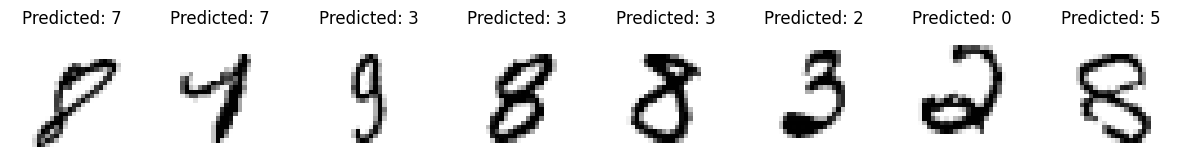

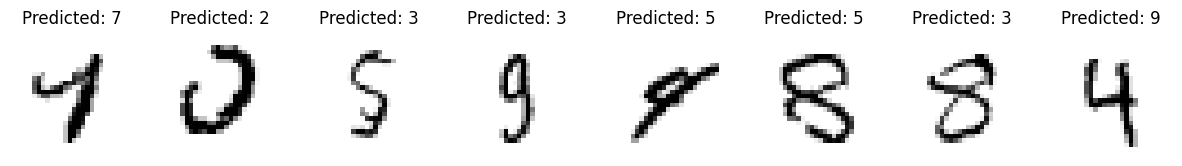

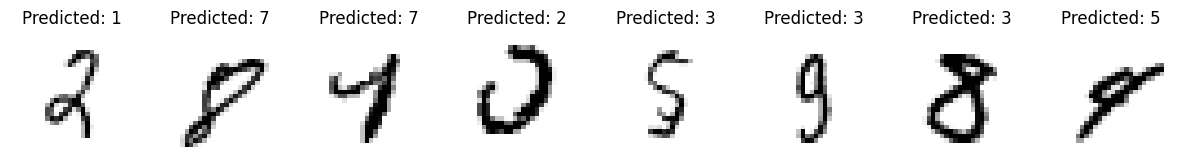

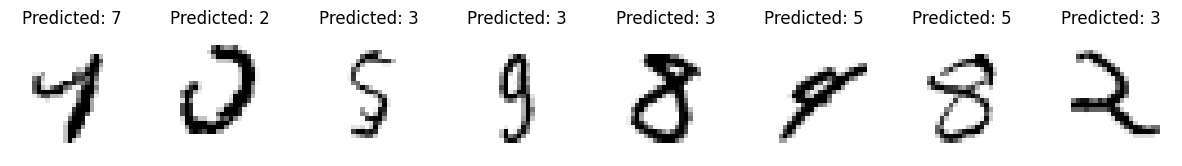

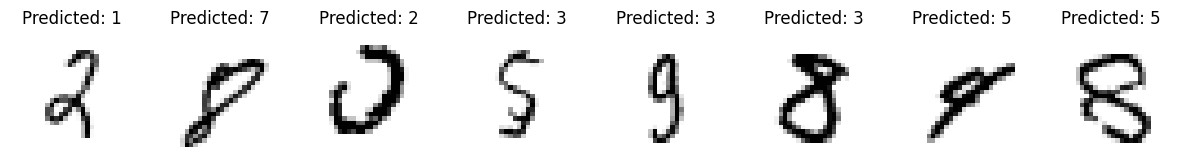

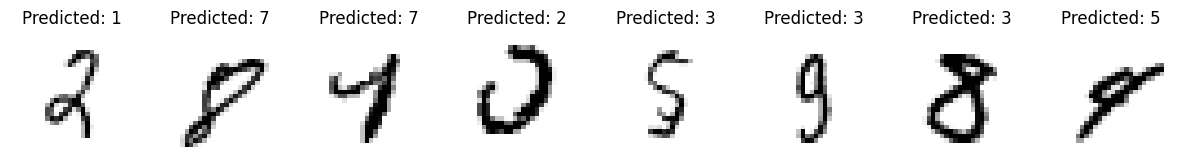

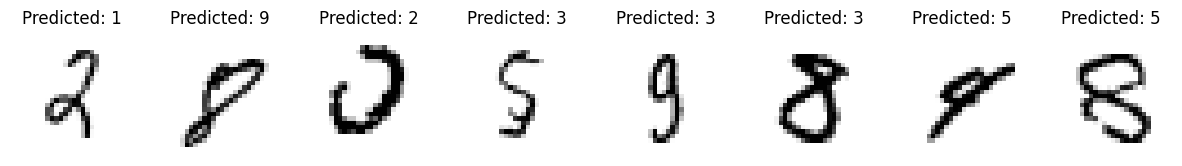

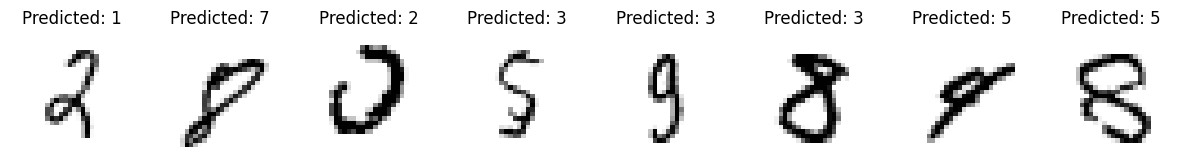

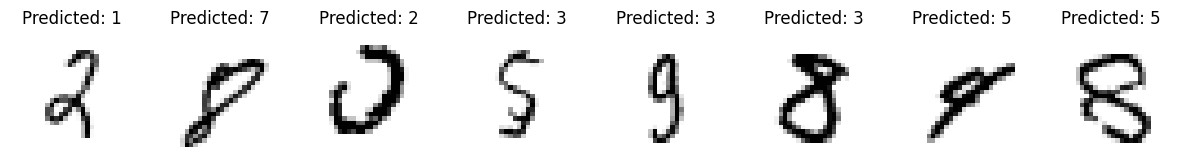

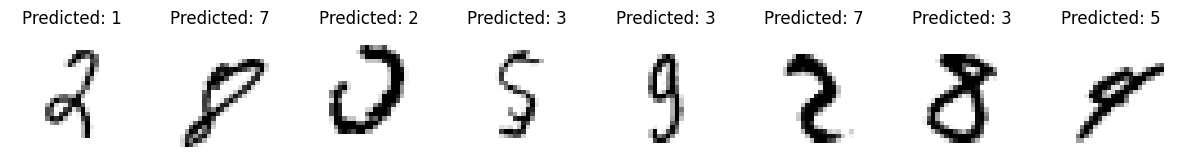

In [35]:
for i in range(len(KNN_classifiers)):
    show_classifier_result(KNN_classifiers[i], train_x, train_y, test_x, test_y)

In [36]:
DTC_classifiers = []
for i in range(10):
    DTC_classifiers.append(DecisionTreeClassifier(max_depth = i+1))

[0.1985, 0.202, 0.194, 0.205, 0.186]
Accuracy 0.1988
[[  0   0   0   0   0   0   0   0   0   0]
 [  8 329  92 239  61 123  95  19 189 109]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [272  15 218  68 233 139 214 287 101 189]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]
[0.334, 0.334, 0.3325, 0.3455, 0.324]
Accuracy 0.3301
[[219   2 164  30  11  66  89  10  48   2]
 [  0 311  55  42   7  15  18  16  39  21]
 [  0   0   0   0   0   0   0   0   0   0]
 [  8  18  37 197  54 108  77   3 150  88]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [ 53  13  54  38 222  73 125 277  53 187]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]
[0.4715, 0.456, 0.49, 0.5015, 0

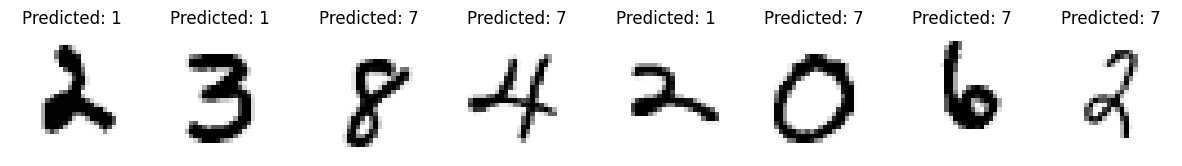

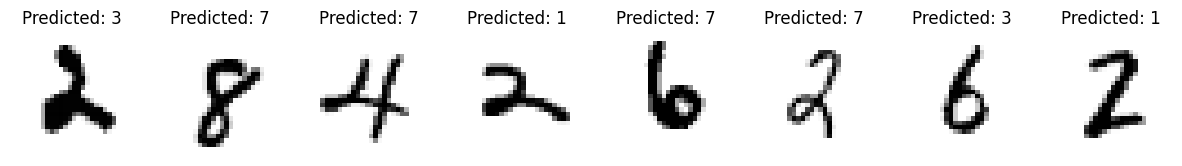

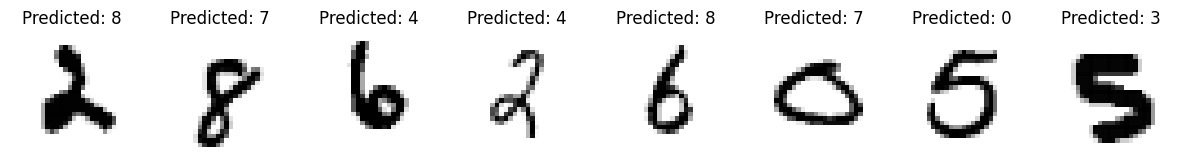

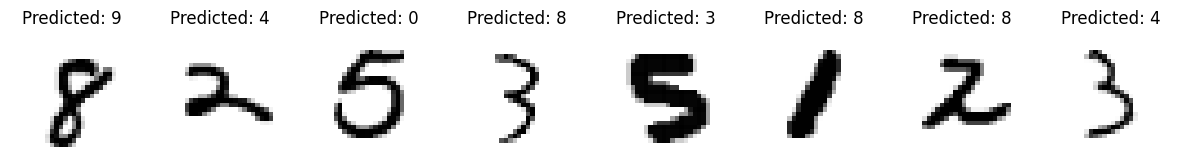

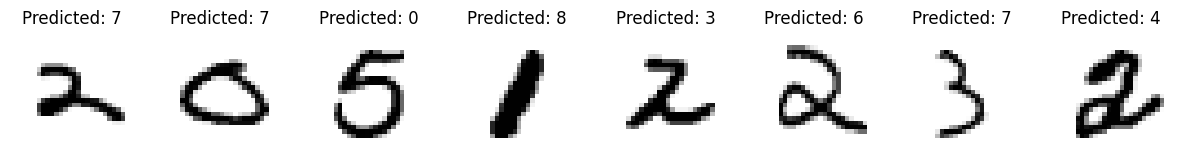

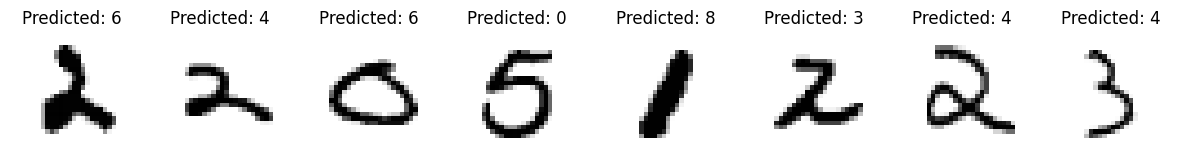

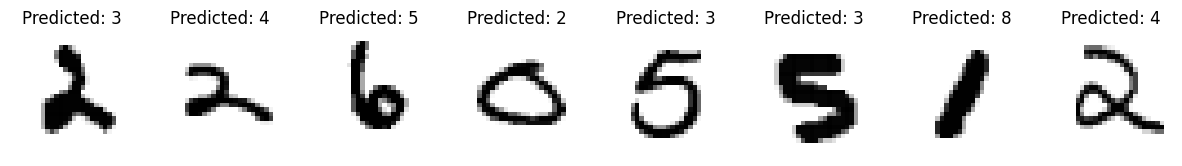

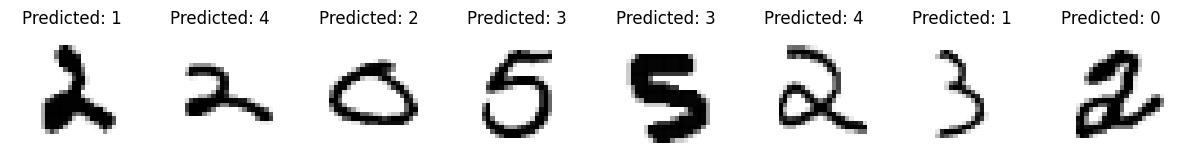

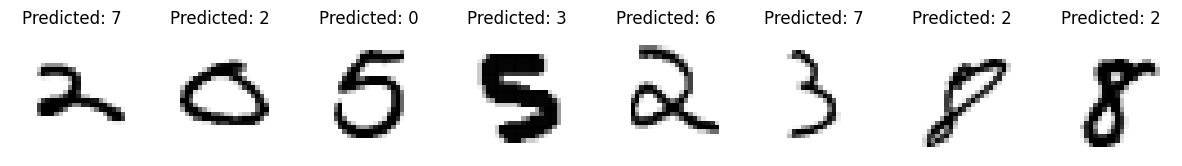

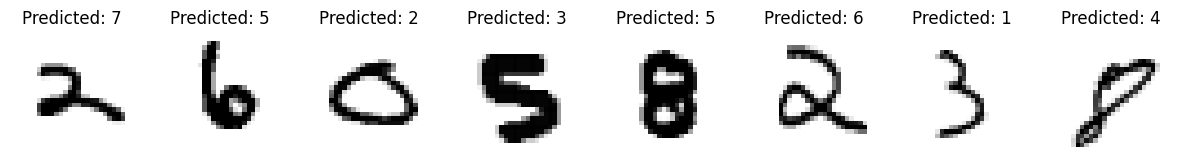

In [37]:
for i in range(len(DTC_classifiers)):
    show_classifier_result(DTC_classifiers[i], train_x, train_y, test_x, test_y)

In [38]:
SVC_classifiers = []
SVC_kernels = {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}
for sv_kernel in SVC_kernels:
    SVC_classifiers.append(SVC(kernel = sv_kernel))

In [39]:
show_classifier_result(SVC_classifiers[0], train_x, train_y, test_x, test_y)

ValueError: Precomputed matrix must be a square matrix. Input is a 8000x784 matrix.

[0.894, 0.9065, 0.911, 0.916, 0.903]
Accuracy 0.9028
[[267   0   2   0   0   8   2   4   2   2]
 [  0 334   4   2   4   7   2   2   8   1]
 [  1   0 270   5   3   3   4   9   1   2]
 [  2   1   7 276   0  13   0   2   7   9]
 [  1   2   7   0 266   2   4   4   2  10]
 [  1   0   1   9   0 202   2   0   6   1]
 [  4   1   4   0   2   5 290   0   1   0]
 [  0   0   5   2   1   1   0 276   0   9]
 [  4   6   8  10   3  15   4   1 256   2]
 [  0   0   2   3  15   6   1   8   7 262]]


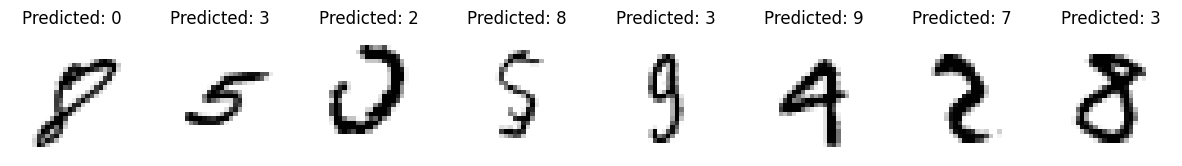

In [40]:
show_classifier_result(LogisticRegression(C = 50.0 / train_samples, penalty = "l1", solver = "saga", tol = 0.1), train_x, train_y, test_x, test_y)